In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure={
            'data': [
                {'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'SF'},
                {'x': [1, 2, 3], 'y': [2, 4, 5], 'type': 'bar', 'name': u'Montréal'},
            ],
            'layout': {
                'title': 'Dash Data Visualization'
            }
        }
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

Running on http://127.0.0.1:8050/
Debugger PIN: 035-540-361
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

/Users/garethwalker/anaconda3/envs/localweather/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
! %tb

/bin/sh: line 0: fg: no job control


In [1]:
import plotly
import plotly.graph_objs as go


In [8]:
import pandas as pd
filename = "KPUD_Well_Depth_2020_04_05.csv"
well_depths=pd.read_csv(filename, index_col=0)
well_depths.index = pd.to_datetime(well_depths.Date)
well_depths  = well_depths.drop('Date', axis=1)
wells_in_df = well_depths['Well Name'].unique()
well_mask = well_depths['Well Name'] == wells_in_df[0]
selected_well = well_depths['Water Level +/- MSL'][well_mask]

In [ ]:
well_depths['']

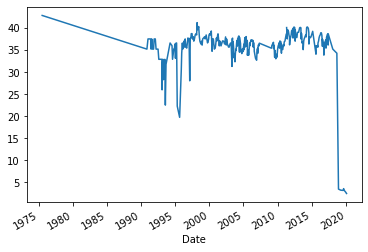

In [11]:
selected_well.plot()

In [16]:
import plotly.express as px
fig = px.line(selected_well,x = selected_well.index, y =selected_well.values)
fig.show()

In [7]:
well_locations

,Unnamed: 0,Location_Key,Depth,Diameter,Owner,Lat,Lon
0,0,AAA001,746.0,16.0,KITSAP COUNTY P U D #1,47.700758,-122.627431
1,1,AAA002,1032.0,20.0,KITSAP COUNTY P.U.D.,47.684675,-122.633792
2,2,AAA005,301.0,8.0,UW Real Estate Office,47.644269,-122.782864
3,3,AAA007,157.0,6.0,HOLLY WATER SYSTEM INC,47.557628,-122.978817
4,4,AAA008,NaN,6.0,HOLLY WATER SYSTEM,47.555519,-122.980400
...,...,...,...,...,...,...,...
139,139,AKR190,135.0,8.0,PUD NO 1 OF KITSAP CO,47.479133,-122.529425
140,140,ALK129,440.0,16.0,KITSAP CO PUD 1,47.805428,-122.506822
141,141,ALK301,743.0,12.0,KITSAP PUD,47.613222,-122.819722
142,142,AHB466,71.0,6.0,STEVE VELIE,47.808929,-122.518709


# Mapping with Plotly

In [42]:
mapbox_token = 'pk.eyJ1IjoiaW50ZXJuZXRnYXJldGgiLCJhIjoiY2pyaWFwOTd1MDB3ZzQ0bzE2Y3B6eWkxMCJ9.9fxAtjyCT5glHuPiK8ee0Q'
import pandas as pd
import plotly.express as px
px.set_mapbox_access_token(mapbox_token)

well_locations = pd.read_csv('Data/Locations/Well_Location_Data.csv', index_col=0)
discharge_locations = pd.read_csv('Data/Locations/Discharge_Location_Data.csv', index_col=0) 
guage_locations = pd.read_csv('Data/Locations/Rain_Guage_Location_Data.csv', index_col=0) 

cols = ['Lat', 'Lon', 'Location_Key', 'Location_Type']
all_locations = pd.concat([discharge_locations[cols], well_locations[cols],guage_locations[cols]])




fig = px.scatter_mapbox(all_locations, lat="Lat", lon="Lon",hover_name ='Location_Key',color='Location_Type',
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)

fig.show()

,Lat,Lon,Location_Key,Location_Type
0,47.700758,-122.627431,AAA001,Well
1,47.684675,-122.633792,AAA002,Well
2,47.644269,-122.782864,AAA005,Well
3,47.557628,-122.978817,AAA007,Well
4,47.555519,-122.980400,AAA008,Well
...,...,...,...,...
139,47.479133,-122.529425,AKR190,Well
140,47.805428,-122.506822,ALK129,Well
141,47.613222,-122.819722,ALK301,Well
142,47.808929,-122.518709,AHB466,Well


In [35]:
#pd.merge(discharge_locations[cols],well_locations[cols])


In [13]:
well_depths = pd.read_csv('Data/TimeSeries/Well_Depths.csv', index_col=0)

In [7]:
import plotly.graph_objs as go

In [12]:
fig = go.Figure(go.Scattermapbox(
        lat=well_meta_data['lat'],
        lon=well_meta_data['lon']))

In [11]:
well_depths = pd.read_csv('Data/TimeSeries/Well_Depths.csv', index_col=0)

In [12]:
well_depths

,Time,AM-PM,Water Level +/- MSL,Well Elevation,Well Name,Location_Key
Date,,,,,,
1975-07-14,12:00:00,AM,42.80,13.00,AAA001 KPUD KEYPORT PRODUCTION WELL 1,AAA001
1990-11-14,8:55:00,AM,35.16,13.00,AAA001 KPUD KEYPORT PRODUCTION WELL 1,AAA001
1991-01-11,7:30:00,AM,37.47,13.00,AAA001 KPUD KEYPORT PRODUCTION WELL 1,AAA001
1991-03-27,7:40:00,AM,37.47,13.00,AAA001 KPUD KEYPORT PRODUCTION WELL 1,AAA001
1991-04-22,7:35:00,AM,37.47,13.00,AAA001 KPUD KEYPORT PRODUCTION WELL 1,AAA001
...,...,...,...,...,...,...
2017-10-09,12:00:00,PM,215.02,286.78,BHN761 KPUD PORT GAMBLE LOSS MW-1,BHN761
2018-01-17,1:30:00,PM,226.22,286.78,BHN761 KPUD PORT GAMBLE LOSS MW-1,BHN761
2018-05-08,9:50:00,AM,220.63,286.78,BHN761 KPUD PORT GAMBLE LOSS MW-1,BHN761
